# Example: Contour plot with streamlines 

In this example, we'll plot a tracer field from CAM and overlay streamlines showing the flow.

In [1]:
%matplotlib inline
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point

## Load the dataset

In [2]:
ds = xr.open_dataset('../data/co2.nc')
ds

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    CO2      (lat, lon) float32 ...
    U        (lat, lon) float32 ...
    V        (lat, lon) float32 ...
Attributes:
    note:         bottom level CO2, U, & V from bgeos5.B20TRC5CN.f09_g16.BPRD...
    time_period:  January 15 2016

## Convert units

In [3]:
mwair = 28.966
mwco2 = 44.
with xr.set_options(keep_attrs=True):
    ds['CO2'] = ds.CO2 * 1.0e6 * mwair / mwco2
    ds.CO2.attrs['units'] = 'ppm'

## Make the plot

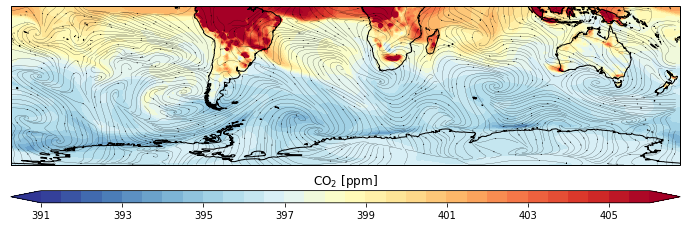

In [4]:
fig = plt.figure(figsize=(12, 12))

# create axis with subplot a project
crs_latlon = ccrs.PlateCarree()
ax = fig.add_subplot(111, projection=crs_latlon)
ax.set_extent([-180, 180. , -85, 0], crs=crs_latlon)
ax.coastlines('50m')

# plot CO2
field, lon = add_cyclic_point(ds.CO2, coord=ds.lon)
cf = ax.contourf(lon, ds.lat, field, 
                 levels=np.arange(391, 406.5, 0.5),
                 cmap='RdYlBu_r',
                 extend='both',
                 transform=ccrs.PlateCarree())

# plot velocity field
uvel, lonu = add_cyclic_point(ds.U, coord=ds.lon)
vvel, lonv = add_cyclic_point(ds.V, coord=ds.lon)

lonu = np.where(lonu>=180.,lonu-360.,lonu)

sp = ax.streamplot(lonu, ds.lat, uvel, vvel,
                   linewidth=0.2,
                   arrowsize = 0.2,
                   density=5,
                   color='k',
                   transform=ccrs.PlateCarree())

# add colorbar
cb = plt.colorbar(cf,orientation='horizontal', pad=0.04, aspect=50)
cb.ax.set_title('CO$_2$ [ppm]');